In [7]:
# # Setup access to my Google Drive
# from google.colab import drive
# drive.mount('/content/drive',  force_remount=False)

# # Set the working directory
# import os
# os.chdir('/content/drive/MyDrive/ViT_myWorks/')
# import warnings
# warnings.filterwarnings("ignore")

In [8]:
# !pip install -q torchmetrics
# !pip install --upgrade pytorch-pretrained-vit
# !pip install efficientnet_pytorch

In [9]:
# from sklearn.manifold import TSNE
# from sklearn.metrics import f1_score, precision_score, recall_score
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sn
# import numpy as np
# import random
import torch
# import torch.nn as nn
# import torchvision.transforms as transforms
# from torchvision.utils import make_grid
# from torch.utils.data import Dataset, DataLoader
# import PIL.Image as Image
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
# import math
import scipy.io as sio
from sklearn.svm import SVC

In [10]:
from resViT.model import *
from resViT.train import *
from resViT.loaddata import *

In [11]:
root = './PBU_400/' #running from local
tarData = [f[:-4] for f in os.listdir(root+'tar3/') if f.endswith('.mat')]
class_names = ['H', 'OR', 'IR']

Validation Accuracy =  99.16666666666667
__________________________________________________
Pricision Score = 0.9885057471264368
__________________________________________________
F_1 Score =  0.9906432748538011
__________________________________________________
Recall Score =  0.9930555555555555
__________________________________________________
Response time per batch 0.7513298988342285
Validation Accuracy =  99.16666666666667
__________________________________________________
Pricision Score = 0.9922480620155039
__________________________________________________
F_1 Score =  0.9918590220898486
__________________________________________________
Recall Score =  0.9916666666666667
__________________________________________________
Response time per batch 0.5456688404083252
Validation Accuracy =  98.33333333333333
__________________________________________________
Pricision Score = 0.9842836257309941
__________________________________________________
F_1 Score =  0.983780193236715
_____

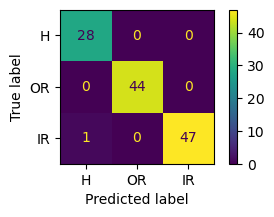

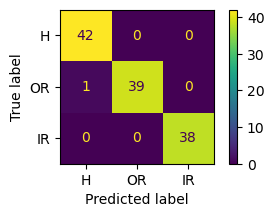

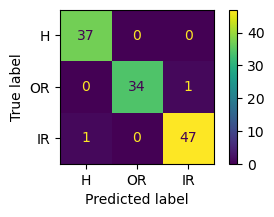

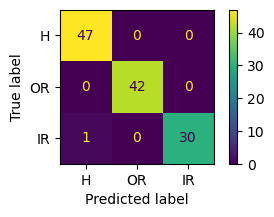

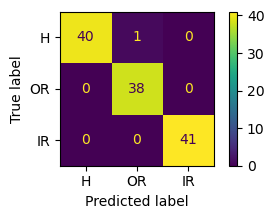

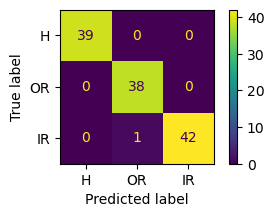

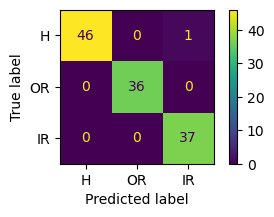

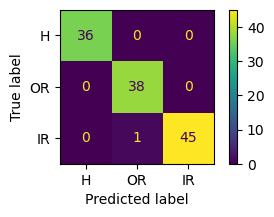

In [12]:
# Validate and Visualize
perfvit = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vit = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        Model = torch.load('./saved_models/ViT_'+ fcase+ '_' + tarData[tar]+'_N.pth', map_location=device)
        _, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate_pr(Model, TestLoader, numClass)
        print('Validation Accuracy = ', 100*val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_vit[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_vit[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels

        perfvit = pd.concat((perfvit, pd.DataFrame({fcase+ '_' + str(tar) : [100*val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/pbu_N_vit.mat', logits_vit)

# Train benchmark models for comparisions
## Models: EfficientNet, ResNeXt, DenseNet, VGGNet, GoogleNet, SqeezeNet

Validation Accuracy =  87.5
__________________________________________________
Pricision Score = 0.8880155510480053
__________________________________________________
F_1 Score =  0.8880914407230197
__________________________________________________
Recall Score =  0.8901515151515151
__________________________________________________
Response time per batch
 0.27347493171691895
Validation Accuracy =  88.33333333333333
__________________________________________________
Pricision Score = 0.8890816900190278
__________________________________________________
F_1 Score =  0.8801247912682987
__________________________________________________
Recall Score =  0.881140350877193
__________________________________________________
Response time per batch
 0.2535736560821533
Validation Accuracy =  94.16666666666667
__________________________________________________
Pricision Score = 0.9403772193245877
__________________________________________________
F_1 Score =  0.9426881720430108
_______________

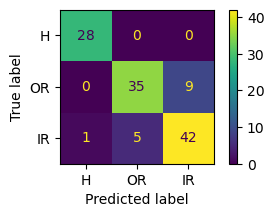

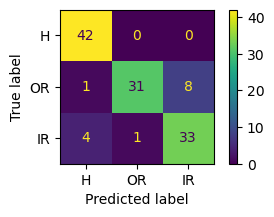

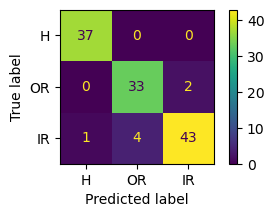

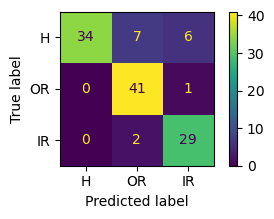

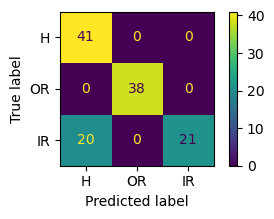

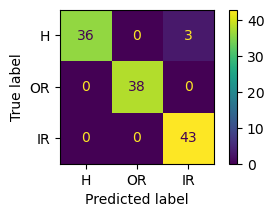

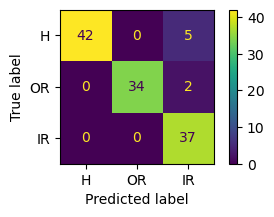

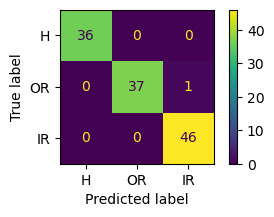

In [13]:
# Validate and Visualize
perfvit_pre = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vit_pre = {} 
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        Model = torch.load('./saved_models/ViT_pre_'+ fcase+ '_' + tarData[tar]+'_N.pth', map_location=device)
        _, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch\n', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_vit_pre[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_vit_pre[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels

        perfvit_pre = pd.concat((perfvit_pre, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
        
sio.savemat('./results/logits/pbu_N_vit_pre.mat', logits_vit_pre)

### EfficientNet

Validation Accuracy =  80.83333333333333
__________________________________________________
Pricision Score = 0.8798309178743962
__________________________________________________
F_1 Score =  0.8205691911574263
__________________________________________________
Recall Score =  0.8220598845598844
__________________________________________________
Response time per batch
 0.2546813488006592
Validation Accuracy =  90.0
__________________________________________________
Pricision Score = 0.8985879332477534
__________________________________________________
F_1 Score =  0.8982831912445102
__________________________________________________
Recall Score =  0.8981620718462824
__________________________________________________
Response time per batch
 0.1344926357269287
Validation Accuracy =  85.0
__________________________________________________
Pricision Score = 0.8982498982498983
__________________________________________________
F_1 Score =  0.8332587801306769
____________________________

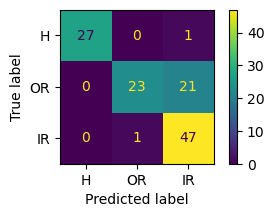

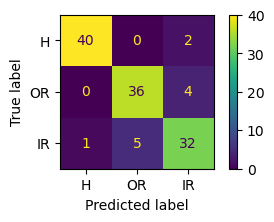

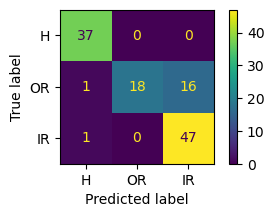

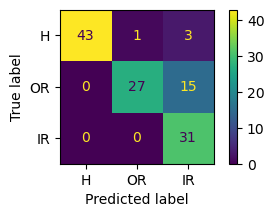

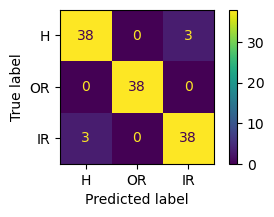

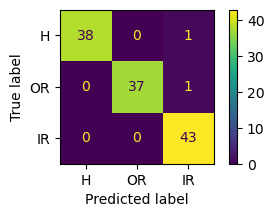

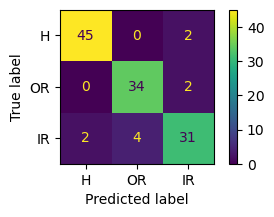

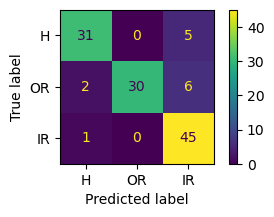

In [14]:
# Validate and Visualize
perfEffNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_effNet = {} 
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        Model = torch.load('./saved_models/efficient_'+ fcase+ '_' + tarData[tar]+'_N.pth', map_location=device)
        _, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch\n', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_effNet[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_effNet[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels

        perfEffNet = pd.concat((perfEffNet, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
        
sio.savemat('./results/logits/pbu_N_effNet.mat', logits_effNet)

### ResNeXt

Validation Accuracy =  86.66666666666667
__________________________________________________
Pricision Score = 0.883838383838384
__________________________________________________
F_1 Score =  0.883838383838384
__________________________________________________
Recall Score =  0.883838383838384
__________________________________________________
Response time per batch 0.2031400203704834
Validation Accuracy =  85.83333333333333
__________________________________________________
Pricision Score = 0.8892700590813799
__________________________________________________
F_1 Score =  0.8615453280197333
__________________________________________________
Recall Score =  0.8610693400167085
__________________________________________________
Response time per batch 0.1571340560913086
Validation Accuracy =  85.83333333333333
__________________________________________________
Pricision Score = 0.8764880952380952
__________________________________________________
F_1 Score =  0.8598867424305453
_______

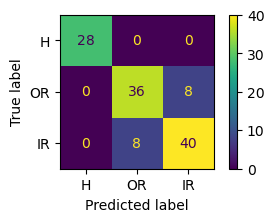

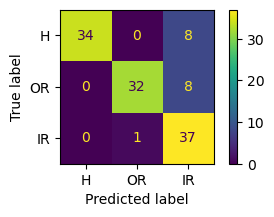

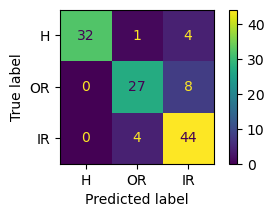

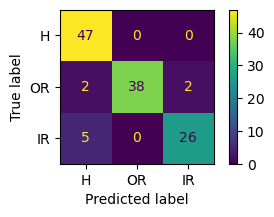

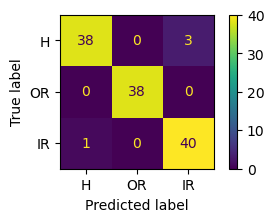

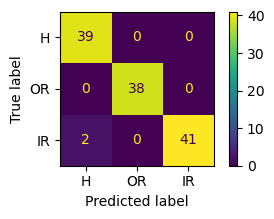

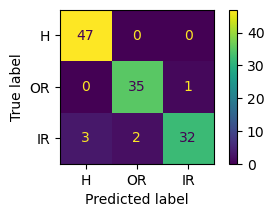

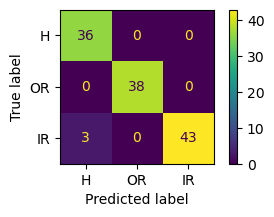

In [15]:
# Validate and Visualize
perfResNeXt = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_ResNeXt = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        Model = torch.load('./saved_models/ResNeXt_'+ fcase+ '_' +tarData[tar]+'_N.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_ResNeXt[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_ResNeXt[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels

        perfResNeXt = pd.concat((perfResNeXt, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/pbu_N_ResNeXt.mat', logits_ResNeXt)

### DenseNet

Validation Accuracy =  82.5
__________________________________________________
Pricision Score = 0.8881518334254652
__________________________________________________
F_1 Score =  0.8375828778359907
__________________________________________________
Recall Score =  0.8328823953823954
__________________________________________________
Response time per batch 0.1727137565612793
Validation Accuracy =  90.0
__________________________________________________
Pricision Score = 0.908531746031746
__________________________________________________
F_1 Score =  0.8969605186247941
__________________________________________________
Recall Score =  0.8964494569757727
__________________________________________________
Response time per batch 0.21622085571289062
Validation Accuracy =  88.33333333333333
__________________________________________________
Pricision Score = 0.8804202326091727
__________________________________________________
F_1 Score =  0.8785052290206931
______________________________

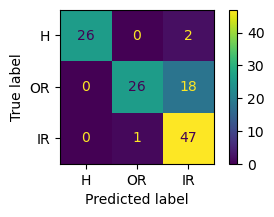

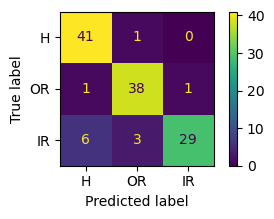

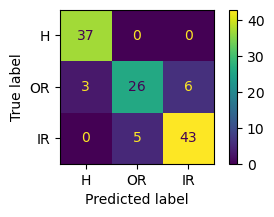

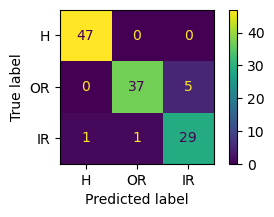

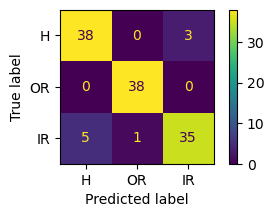

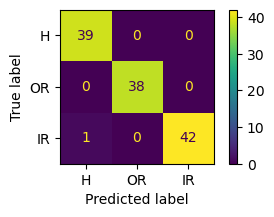

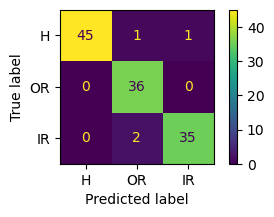

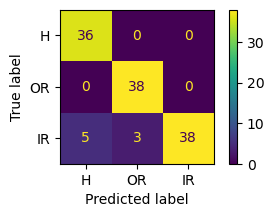

In [16]:
# Validate and Visualize
perfDenseNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_DenseNet = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        Model = torch.load('./saved_models/DenseNet_'+ fcase+ '_' +tarData[tar]+'_N.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_DenseNet[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_DenseNet[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfDenseNet = pd.concat((perfDenseNet, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/pbu_N_DenseNet.mat', logits_DenseNet)

### vgg16Net

Validation Accuracy =  89.16666666666667
__________________________________________________
Pricision Score = 0.917654496601865
__________________________________________________
F_1 Score =  0.901116990005879
__________________________________________________
Recall Score =  0.8941197691197691
__________________________________________________
Response time per batch

 0.23079562187194824
Validation Accuracy =  87.5
__________________________________________________
Pricision Score = 0.8816137566137566
__________________________________________________
F_1 Score =  0.8746099846540635
__________________________________________________
Recall Score =  0.874436090225564
__________________________________________________
Response time per batch

 0.23689842224121094
Validation Accuracy =  90.83333333333333
__________________________________________________
Pricision Score = 0.9116789516789517
__________________________________________________
F_1 Score =  0.9087526902652954
______________

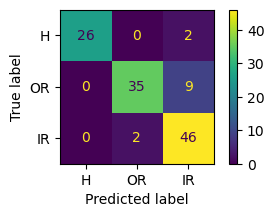

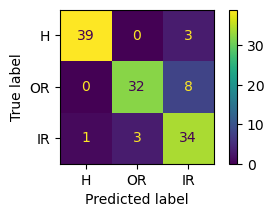

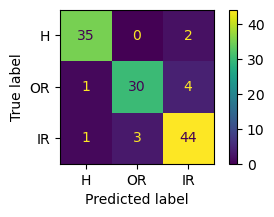

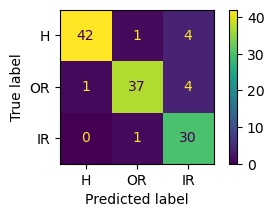

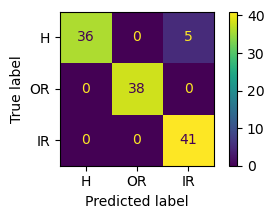

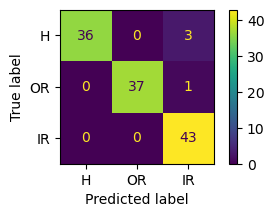

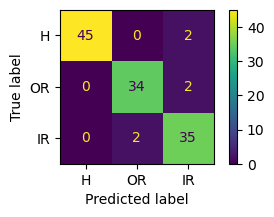

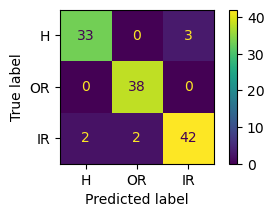

In [17]:
# Validate and Visualize
perfvgg16Net = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vgg16Net = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        Model = torch.load('./saved_models/vgg16Net_'+ fcase+ '_' +tarData[tar]+'_N.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch\n\n', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_vgg16Net[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_vgg16Net[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfvgg16Net = pd.concat((perfvgg16Net, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/pbu_N_vgg16Net.mat', logits_vgg16Net)

### GoogleNet

Validation Accuracy =  74.16666666666667
__________________________________________________
Pricision Score = 0.7824608104111209
__________________________________________________
F_1 Score =  0.7708991621460014
__________________________________________________
Recall Score =  0.7616341991341992
__________________________________________________
Response time per batch 0.0999758243560791
Validation Accuracy =  88.33333333333333
__________________________________________________
Pricision Score = 0.8886211386211387
__________________________________________________
F_1 Score =  0.8837089636719152
__________________________________________________
Recall Score =  0.8843984962406015
__________________________________________________
Response time per batch 0.11712336540222168
Validation Accuracy =  85.0
__________________________________________________
Pricision Score = 0.8527851458885941
__________________________________________________
F_1 Score =  0.8457894736842105
________________

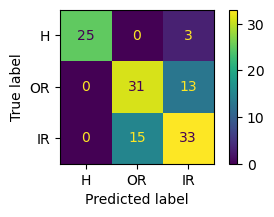

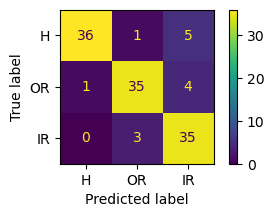

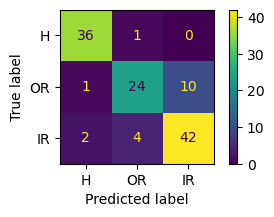

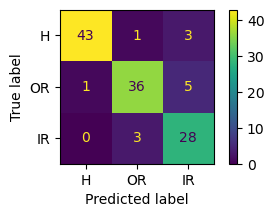

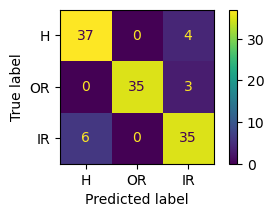

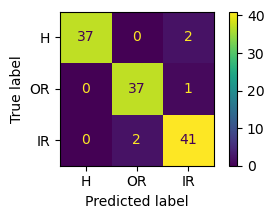

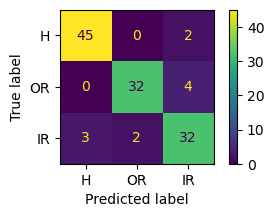

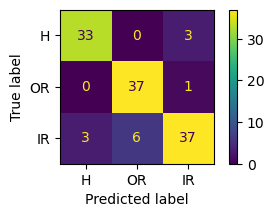

In [18]:
# Validate and Visualize
perfgoogleNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vgoogleNet = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        Model = torch.load('./saved_models/GoogleNet_'+ fcase+ '_' +tarData[tar]+'_N.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_vgoogleNet[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_vgoogleNet[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfgoogleNet = pd.concat((perfgoogleNet, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/pbu_N_vgoogleNet.mat', logits_vgoogleNet)

### SqeezeNet

Validation Accuracy =  89.16666666666667
__________________________________________________
Pricision Score = 0.911507191994997
__________________________________________________
F_1 Score =  0.9035835886959482
__________________________________________________
Recall Score =  0.9034992784992785
__________________________________________________
Response time per batch 0.05435752868652344
Validation Accuracy =  91.66666666666666
__________________________________________________
Pricision Score = 0.9188034188034188
__________________________________________________
F_1 Score =  0.9164517893420848
__________________________________________________
Recall Score =  0.9165413533834587
__________________________________________________
Response time per batch 0.055458784103393555
Validation Accuracy =  89.16666666666667
__________________________________________________
Pricision Score = 0.8953920475659606
__________________________________________________
F_1 Score =  0.894133495197325
___

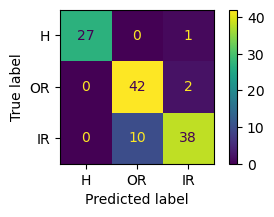

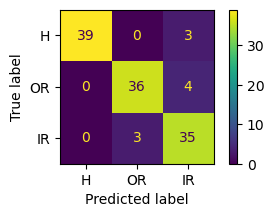

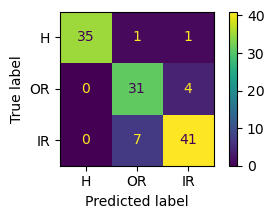

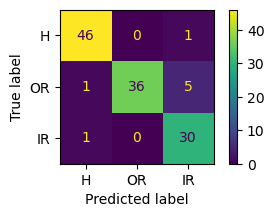

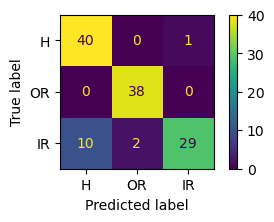

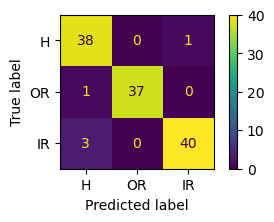

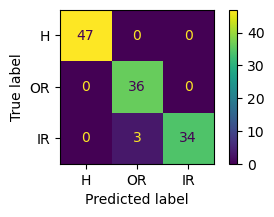

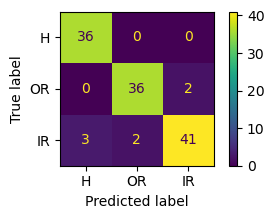

In [19]:
# Validate and Visualize

# Validate and Visualize
perfSqeezeNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_SqueezeNet = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        Model = torch.load('./saved_models/SqeezeNet_'+ fcase+ '_' +tarData[tar]+'_N.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_SqueezeNet[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_SqueezeNet[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfSqeezeNet = pd.concat((perfSqeezeNet, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/pbu_N_SqueezeNet.mat', logits_SqueezeNet)

Validation Accuracy =  0.75
__________________________________________________
Pricision Score = 0.7650592495062541
__________________________________________________
F_1 Score =  0.7502984974058352
__________________________________________________
Recall Score =  0.7673160173160173
__________________________________________________
Response time per batch 4.784210443496704
Validation Accuracy =  0.8583333333333333
__________________________________________________
Pricision Score = 0.8707774769779402
__________________________________________________
F_1 Score =  0.8575071343091226
__________________________________________________
Recall Score =  0.8586048454469507
__________________________________________________
Response time per batch 5.306971788406372
Validation Accuracy =  0.6333333333333333
__________________________________________________
Pricision Score = 0.7541795551627631
__________________________________________________
F_1 Score =  0.633850762527233
__________________

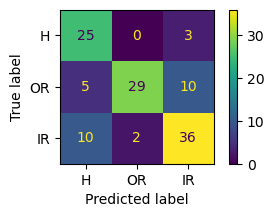

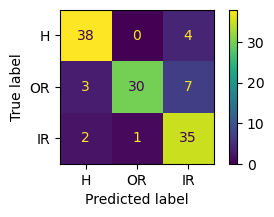

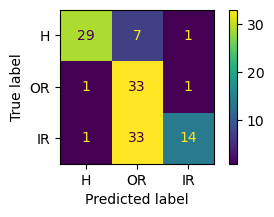

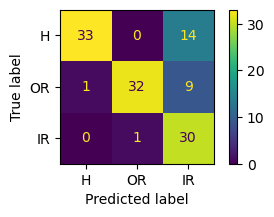

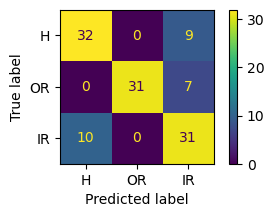

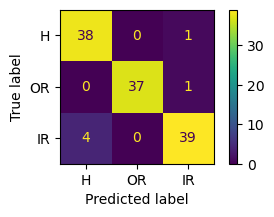

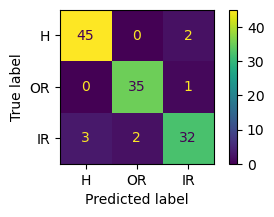

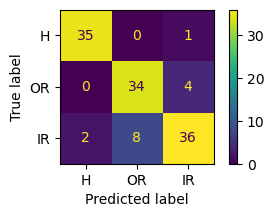

In [20]:
# Train and validate SVM
perfSVM = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_SVM = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        TrainLoader, TestLoader, _, numClass = loadNoisydata(root_path, tarData[tar])
        x_train, y_train = getFeatures(TrainLoader)
        model = SVC()
        model.fit(x_train, y_train)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate_svm(model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_SVM[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_SVM[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfSVM = pd.concat((perfSVM, pd.DataFrame({fcase+ '_' + str(tar) : [100*val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/pbu_N_SVM.mat', logits_SVM)

In [21]:
# df = pd.read_csv('./results/all_pbu.csv')
# df.drop('Unnamed: 0', axis = 1, inplace=True)
# df.columns = pd.RangeIndex(start=0, stop=9, step=1)
# df

In [22]:
perfSVM

,0,1,2,3,4,5,6,7,8
0,Val Acc.,75.000000,85.833333,63.333333,79.166667,78.333333,95.000000,93.333333,87.500000
1,Precision,0.765059,0.870777,0.754180,0.835441,0.807160,0.951994,0.932577,0.877840
2,F1_score,0.750298,0.857507,0.633851,0.794145,0.791394,0.951170,0.931720,0.878830
3,Recall,0.767316,0.858605,0.672769,0.810591,0.784125,0.951673,0.931511,0.883189


In [23]:
combPerf = pd.concat((perfSVM, perfSqeezeNet, perfgoogleNet, perfvgg16Net, perfDenseNet, perfResNeXt, perfEffNet, perfvit_pre, perfvit), ignore_index=True, axis=0)
combPerf

,0,1,2,3,4,5,6,7,8
0,Val Acc.,75.000000,85.833333,63.333333,79.166667,78.333333,95.000000,93.333333,87.500000
1,Precision,0.765059,0.870777,0.754180,0.835441,0.807160,0.951994,0.932577,0.877840
2,F1_score,0.750298,0.857507,0.633851,0.794145,0.791394,0.951170,0.931720,0.878830
3,Recall,0.767316,0.858605,0.672769,0.810591,0.784125,0.951673,0.931511,0.883189
4,Val Acc.,89.166667,91.666667,89.166667,93.333333,89.166667,95.833333,97.500000,94.166667
5,Precision,0.911507,0.918803,0.895392,0.930556,0.905556,0.960124,0.974359,0.941311
6,F1_score,0.903584,0.916452,0.894133,0.929007,0.890127,0.959106,0.972582,0.942906
7,Recall,0.903499,0.916541,0.895276,0.934536,0.894309,0.959425,0.972973,0.946224
8,Val Acc.,74.166667,88.333333,85.000000,89.166667,89.166667,95.833333,90.833333,89.166667
9,Precision,0.782461,0.888621,0.852785,0.885017,0.897933,0.960179,0.906927,0.893190


In [24]:
combPerf.to_csv('./results/all_pbu_N.csv')